In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from geopy.distance import vincenty
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#from mpl_toolkits.basemap import Basemap
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## second floor before covid19

In [4]:
df_before = pd.read_csv("/Users/ruichao/Desktop/datapart2/25.txt")
df_before.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']

In [5]:
df_before = df_before[(df_before['time'] > "06:00:00") & (df_before['time'] < "22:00:00")]

In [6]:
df_before['macaddress'].value_counts(ascending=False)

88:66:a5:55:b8:76    13231
48:a4:72:ae:11:6d    12626
ec:2c:e2:37:1d:7b    12077
b4:9c:df:7d:d1:c8    11854
88:66:a5:1d:16:cd    11673
                     ...  
24:46:c8:3b:f4:95        3
f4:f5:24:6a:1e:99        3
88:b4:a6:d6:62:12        3
24:46:c8:f2:42:c7        3
c0:bd:d1:b5:70:ca        3
Name: macaddress, Length: 3857, dtype: int64

In [7]:
df_before['date'].value_counts(ascending=False)

2019-11-12    405660
2019-12-02    371801
2019-11-28    317280
2019-12-03    280222
2019-11-11    223570
2019-11-29     87945
2019-11-13       186
2019-11-30       135
Name: date, dtype: int64

In [10]:
df_one_day = df_before[df_before['date'] == '2019-11-28']

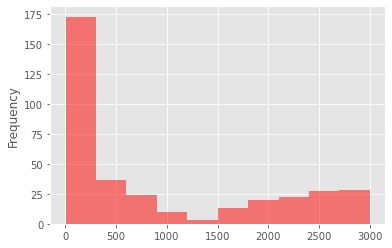

In [12]:
series = df_one_day['macaddress'].value_counts(ascending=False)
list_ = series.to_list()
p = series.plot(kind='hist', color='r', alpha=0.5)

## average daily count of macaddress before covid 19

In [20]:
avg_count_before = sum(df_before['date'].value_counts(ascending=False))/len(df_before['date'].value_counts(ascending=False))
avg_count_before

210849.875

## second floor after covid19

In [13]:
df_after = pd.read_csv("/Users/ruichao/Desktop/datapart2/21.txt")
df_after.columns = ['building', 'location', 'macaddress','latitude','longitude','date','time']
df_after = df_after[(df_after['time'] > "06:00:00") & (df_after['time'] < "22:00:00")]
df_after['macaddress'].value_counts(ascending=False)
df_after['date'].value_counts(ascending=False)


2020-07-30    143980
2020-07-20    103981
2020-07-23     97935
2020-07-15     93479
2020-07-22     78865
2020-07-13     68227
2020-07-16     67350
2020-07-28     64532
2020-07-27     59682
2020-07-29     51789
2020-07-09     35850
2020-07-21     29243
2020-08-03     13369
2020-07-24      6003
2020-07-17      5042
2020-07-10      3061
2020-07-14      2851
2020-07-31      1279
2020-07-12       904
2020-07-26       582
2020-07-25       493
2020-08-02       327
2020-07-19       325
2020-07-18       298
2020-07-11       277
2020-08-01       217
Name: date, dtype: int64

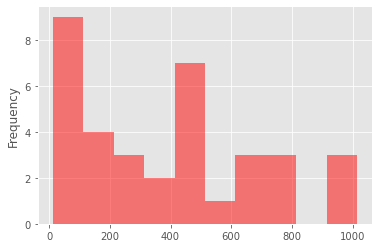

In [17]:
df_oneday2 = df_after[df_after['date'] == '2020-08-03']
series2 = df_oneday2['macaddress'].value_counts(ascending=False)
list_2 = series2.to_list()
p = series2.plot(kind='hist', color='r', alpha=0.5)

## average daily count of macaddress after covid 19

In [19]:
avg_count_after = sum(df_after['date'].value_counts(ascending=False))/len(df_after['date'].value_counts(ascending=False))
avg_count_after

35766.96153846154